#### Сравнение библиотек

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Yfw56a_KXNjnn_Y0BOgtzw.png)

#### Задания

In [1]:
#!pip uninstall pandas
#!pip install pandas

In [2]:
import pandas as pd

#### Создание объектов Pandas

In [3]:
data = [10, 20, 30, 40, 50]
s = pd.Series(data)

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 28],
        'City': ['New York', 'London', 'Paris']}
df = pd.DataFrame(data)

#### Чтение данных

In [4]:
# тут все понятно, поэтому я добавила только csv в папку
df = pd.read_csv('avocado.csv') 
# df = pd.read_excel('data.xlsx', sheet_name='Sheet1')
# df = pd.read_json('data.json')

#### Запись данных + Обработка и очистка данных
Для того, чтобы начать очистку данных, выведем первые две строки файла

In [5]:
# df.info()
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [6]:
# удаляем ненужные колонки
drop_columns = ['Unnamed: 0','4046','4225','4770','type']
df = df.drop(labels=drop_columns, axis=1)

# преобразуем столбец дат в нужный тип
df['Date'] = pd.to_datetime(df['Date'])

df.to_csv('avocado_from_pandas.csv', index=False)

# Для других форматов
# df.to_excel('data.xlsx', sheet_name='Sheet1', index=False)
# df.to_json('data.json')

In [7]:
# df.info()
df.head(2)

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,2015,Albany


#### Группировка данных

In [8]:
# группируем датасет сверху по региону и посчитаем среднее количество проданных авокадо
# выведем 10 регионов с наибольшими продажами

grouped = df.groupby('region')['Total Volume'].mean()
sorted_and_formatted = grouped.sort_values(ascending=False).apply(lambda x: f"{x:.1f}")
sorted_and_formatted.head()

region
TotalUS         17351302.3
West             3215322.9
California       3044324.4
SouthCentral     2991951.5
Northeast        2110298.5
Name: Total Volume, dtype: object

#### Соединение таблиц

In [9]:
import pandas as pd

customers_data = {
    'CustomerID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Email': ['alice@example.com', 'bob@example.com', 'charlie@example.com', 'david@example.com']}

customers_df = pd.DataFrame(customers_data)

orders_data = {
    'OrderID': [101, 102, 103, 104],
    'CustomerID': [1, 2, 1, 3],
    'OrderAmount': [250.75, 150.50, 300.00, 400.00]}

orders_df = pd.DataFrame(orders_data)

merged_df = pd.merge(customers_df, orders_df, on='CustomerID', how='inner')

merged_df.head()

,CustomerID,Name,Email,OrderID,OrderAmount
0,1,Alice,alice@example.com,101,250.75
1,1,Alice,alice@example.com,103,300.00
2,2,Bob,bob@example.com,102,150.50
3,3,Charlie,charlie@example.com,104,400.00


#### Анализ данных о продажах

In [10]:
sales = pd.read_csv('video_game_sales.csv')

sales = sales.dropna(subset=['year']) # удалили строки, в которых нет года выпуска игры
sales['year'] = pd.to_numeric(sales['year'], errors='coerce').astype(int) # привела к типу данных int

# sales.info()
sales.head(3)

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


Общая сумма продаж: 8820.05


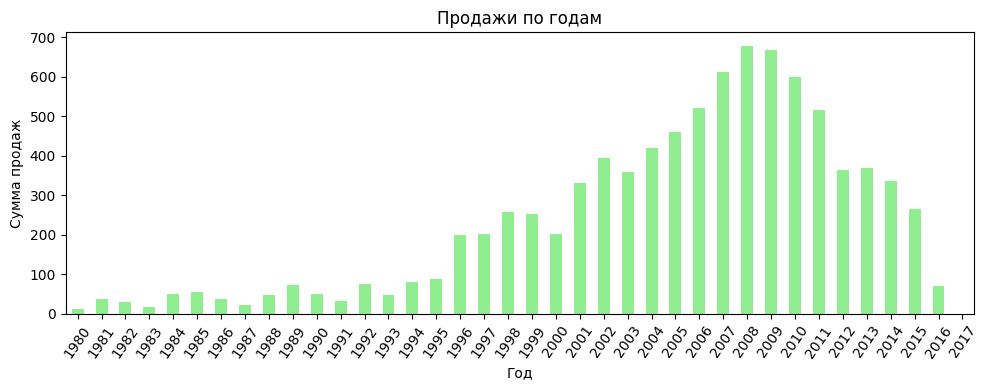

In [11]:
import matplotlib.pyplot as plt

total_sales = sales['global_sales'].sum()
print(f'Общая сумма продаж: {total_sales}')

year_grouped = sales.groupby('year')['global_sales'].sum()

plt.figure(figsize=(10, 4))

year_grouped.plot(kind='bar', color='lightgreen')
plt.title('Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

#### Анализ данных о фильмах

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('IMBD.csv')
df.head(2)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"


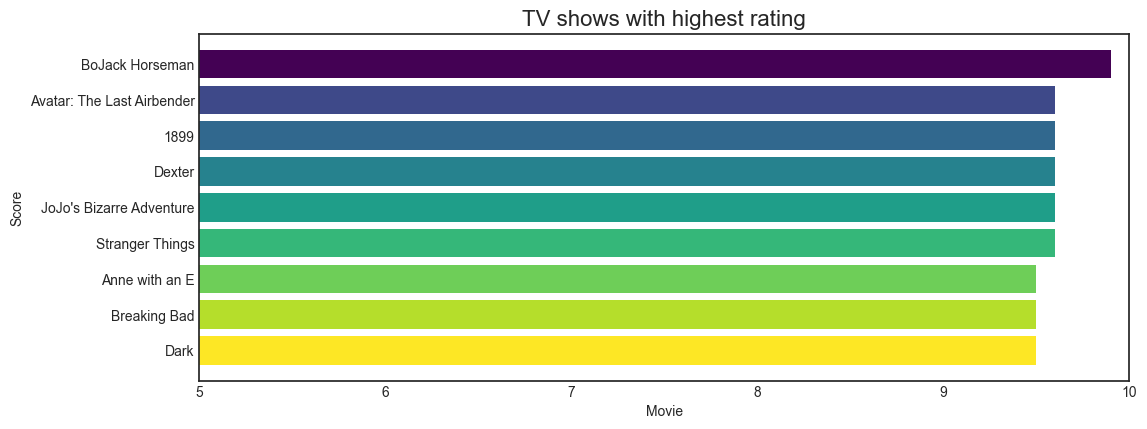

In [14]:
df['rating'] = df['rating'].replace({'NAN': 0})
df['rating'] = df['rating'].astype(float)

highest_rating = df.sort_values(by='rating' , ascending=False)[['title' , 
                                                                'rating']].head(10)
plt.figure(figsize=(12, 4.5))
plt.style.use('seaborn-v0_8-white')
colors = plt.cm.viridis(np.linspace(0, 1, len(highest_rating)))
bars = plt.barh(highest_rating['title'], highest_rating['rating'], color=colors)

plt.title('TV shows with highest rating', size = 16)
plt.xlabel('Movie')
plt.ylabel('Score')
plt.gca().invert_yaxis()
plt.xlim(5, 10)
plt.show()